In [1]:
import jax.numpy as np
import jax.random as jr
import matplotlib.pyplot as plt

from ssm.hmm import BinomialHMM

In [2]:
hmm = BinomialHMM(2, 10, emission_total_counts=15 * np.ones(10), seed=jr.PRNGKey(1))
states, data = hmm.sample(key=jr.PRNGKey(0), num_steps=100)

In [3]:
test_hmm = BinomialHMM(3, 10, emission_total_counts=15 * np.ones(10), seed=jr.PRNGKey(0))
lps, test_hmm, posterior = test_hmm.fit(data)

Initializing...
Done.


[converged] LP: -1917.074:  32%|███▏      | 32/100 [00:01<00:02, 25.39it/s]


In [4]:
hmm.marginal_likelihood(data)

DeviceArray(-1934.7361, dtype=float32)

In [5]:
test_hmm.marginal_likelihood(data)

DeviceArray(-1917.0737, dtype=float32)

Text(0.5, 1.0, 'observed data')

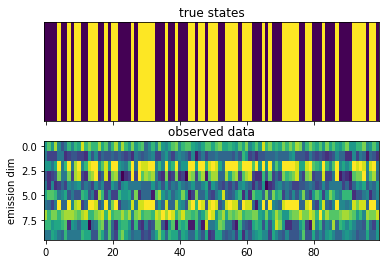

In [9]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].imshow(states[None, :], aspect="auto")
axs[0].set_yticks([])
axs[0].set_title("true states")
axs[1].imshow(data.T, aspect="auto")
axs[1].set_ylabel("emission dim")
axs[1].set_title("observed data")